# Basis: Tensor Operations

This notebook shows how to create and operate on vectors, matrices, and tensors using PixelPrism's public helpers.


In [1]:
import numpy as np
import pixelprism.inspect as pinspect
from pixelprism.math import utils, DType, MathExpr
from pixelprism.math.functional import elementwise as F
from pixelprism.math.render import render_latex


## Creation utilities

Use the utility constructors for scalars, vectors, matrices, and higher-rank tensors.


In [2]:
scalar = utils.scalar(name="scalar", value=3.0, dtype=DType.FLOAT32)
vector = utils.vector(name="vector", value=[1.0, 2.0, 3.0], dtype=DType.FLOAT32)
matrix = utils.matrix(name="matrix", value=[[1.0, 2.0], [3.0, 4.0]], dtype=DType.FLOAT32)
tensor3d = utils.tensor(name="tensor3d", data=[[[1.0, 2.0], [3.0, 4.0]]], dtype=DType.FLOAT32)

print(scalar)
print(vector)
print(matrix)
print(tensor3d)


tensor(scalar, 3.0, dtype=DType.FLOAT32, shape=())
tensor(vector, [1.0, 2.0, 3.0], dtype=DType.FLOAT32, shape=(3,))
tensor(matrix, [[1.0, 2.0], [3.0, 4.0]], dtype=DType.FLOAT32, shape=(2, 2))
tensor(tensor3d, [[[1.0, 2.0], [3.0, 4.0]]], dtype=DType.FLOAT32, shape=(1, 2, 2))


## Convenience constructors

You can also allocate common tensor shapes directly.


In [3]:
zeros = utils.zeros(name="zeros", shape=(2, 2), dtype=DType.FLOAT32)
ones = utils.ones(name="ones", shape=(2, 2), dtype=DType.FLOAT32)
full = utils.full(name="full", shape=(2, 2), value=5.0, dtype=DType.FLOAT32)
identity = utils.eye_like(name="identity", x=zeros)

print(zeros)
print(ones)
print(full)
print(identity)


tensor(zeros, [[0.0, 0.0], [0.0, 0.0]], dtype=DType.FLOAT32, shape=(2, 2))
tensor(ones, [[1.0, 1.0], [1.0, 1.0]], dtype=DType.FLOAT32, shape=(2, 2))
tensor(full, [[5.0, 5.0], [5.0, 5.0]], dtype=DType.FLOAT32, shape=(2, 2))
tensor(identity, [[1.0, 0.0], [0.0, 1.0]], dtype=DType.FLOAT32, shape=(2, 2))


## Operators

We can combine tensors with scalars and with tensors of the same shape using the arithmetic operators.


In [14]:
tensor_a = utils.vector(name="\mathbf{T}", value=[1.0, 2.0, 3.0], dtype=DType.FLOAT32)
tensor_b = utils.vector(name="\mathbf{X}", value=[4.0, 5.0, 6.0], dtype=DType.FLOAT32)
scalar_two = utils.scalar(name="two", value=2.0, dtype=DType.FLOAT32, mutable=False)

ops = {
    "tensor + scalar": MathExpr.add(tensor_a, scalar_two),
    "tensor - scalar": MathExpr.sub(tensor_a, scalar_two),
    "tensor * scalar": MathExpr.mul(tensor_a, scalar_two),
    "tensor / scalar": MathExpr.div(tensor_a, scalar_two),
    "-tensor": MathExpr.neg(tensor_a),
    "tensor + tensor": MathExpr.add(tensor_a, tensor_b),
    "tensor - tensor": MathExpr.sub(tensor_a, tensor_b),
    "tensor * tensor": MathExpr.mul(tensor_a, tensor_b),
    "tensor / tensor": MathExpr.div(tensor_a, tensor_b),
}

for label, expr in ops.items():
    print(f"{label}: {expr} -> {expr.eval()}")


<>:1: SyntaxWarning: invalid escape sequence '\m'
<>:2: SyntaxWarning: invalid escape sequence '\m'
<>:1: SyntaxWarning: invalid escape sequence '\m'
<>:2: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_39078/1253431591.py:1: SyntaxWarning: invalid escape sequence '\m'
  tensor_a = utils.vector(name="\mathbf{T}", value=[1.0, 2.0, 3.0], dtype=DType.FLOAT32)
/tmp/ipykernel_39078/1253431591.py:2: SyntaxWarning: invalid escape sequence '\m'
  tensor_b = utils.vector(name="\mathbf{X}", value=[4.0, 5.0, 6.0], dtype=DType.FLOAT32)


tensor + scalar: <MathExpr #49 add float32 (3,) c:2> -> [3. 4. 5.]
tensor - scalar: <MathExpr #50 sub float32 (3,) c:2> -> [-1.  0.  1.]
tensor * scalar: <MathExpr #51 mul float32 (3,) c:2> -> [2. 4. 6.]
tensor / scalar: <MathExpr #52 div float32 (3,) c:2> -> [0.5 1.  1.5]
-tensor: <MathExpr #53 neg float32 (3,) c:1> -> [-1. -2. -3.]
tensor + tensor: <MathExpr #54 add float32 (3,) c:2> -> [5. 7. 9.]
tensor - tensor: <MathExpr #55 sub float32 (3,) c:2> -> [-3. -3. -3.]
tensor * tensor: <MathExpr #56 mul float32 (3,) c:2> -> [ 4. 10. 18.]
tensor / tensor: <MathExpr #57 div float32 (3,) c:2> -> [0.25 0.4  0.5 ]


## Functional API

You can also use the functional arithmetic helpers.


In [15]:
functional_ops = {
    "add": F.add(tensor_a, tensor_b),
    "sub": F.sub(tensor_a, tensor_b),
    "mul": F.mul(tensor_a, tensor_b),
    "div": F.div(tensor_a, tensor_b),
    "neg": F.neg(tensor_a),
}

for label, expr in functional_ops.items():
    print(f"{label}: {expr.eval()}")


add: [5. 7. 9.]
sub: [-3. -3. -3.]
mul: [ 4. 10. 18.]
div: [0.25 0.4  0.5 ]
neg: [-1. -2. -3.]


## Visualize a computation

Inspect the computation graph and render its LaTeX form.


In [16]:
expr = MathExpr.div(MathExpr.add(tensor_a, tensor_b), scalar_two)

tree_viz = pinspect.inspect(expr, backend="graphviz")
tree_viz

latex_image = render_latex(expr, output_path="basis_tensor_expr.svg")
latex_image

print("Expression evaluation:", expr.eval())


This is pdfTeX, Version 3.141592653-2.6-1.40.26 (TeX Live 2025/dev/Debian) (preloaded format=pdflatex)
 restricted \write18 enabled.
entering extended mode
(./tmp_latex/equation.tex
LaTeX2e <2024-11-01> patch level 2
L3 programming layer <2025-01-18>
(/usr/share/texlive/texmf-dist/tex/latex/standalone/standalone.cls
Document Class: standalone 2025/02/22 v1.5a Class to compile TeX sub-files stan
dalone
(/usr/share/texlive/texmf-dist/tex/latex/tools/shellesc.sty)
(/usr/share/texlive/texmf-dist/tex/generic/iftex/ifluatex.sty
(/usr/share/texlive/texmf-dist/tex/generic/iftex/iftex.sty))
(/usr/share/texlive/texmf-dist/tex/latex/xkeyval/xkeyval.sty
(/usr/share/texlive/texmf-dist/tex/generic/xkeyval/xkeyval.tex
(/usr/share/texlive/texmf-dist/tex/generic/xkeyval/xkvutils.tex
(/usr/share/texlive/texmf-dist/tex/generic/xkeyval/keyval.tex))))
(/usr/share/texlive/texmf-dist/tex/latex/standalone/standalone.cfg)
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2024/06

pre-processing DVI file (format version 2)
processing page 1
  computing extents based on data set by preview package (version 13.2)
  width=28.916496pt, height=20.485703pt, depth=0pt
  graphic size: 28.916496pt x 20.485687pt (28.808465bp x 20.409153bp)
  output written to basis_tensor_expr.svg
1 of 1 page converted in 0.0277901 seconds


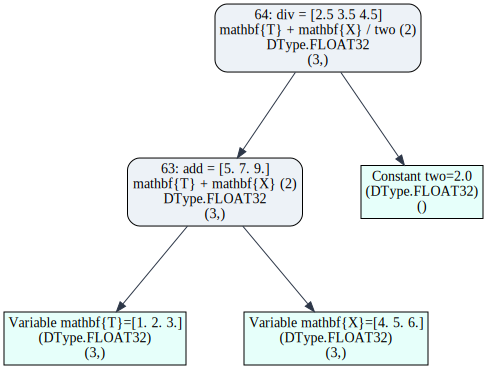

In [17]:
tree_viz

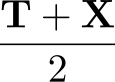

In [18]:
latex_image